In [2]:
import pandas as pd
import numpy as np
import os
import ast
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv()
path_to_drive = os.environ.get('path_to_drive')

In [3]:
df = pd.read_parquet(path_to_drive + r'temp_ideas_embe_117_processed.parquet')
print(df.columns)

Index(['idea_db_id', 'tag_name', 'tag_description', 'tag_type', 'is_private',
       'category', 'stage', 'like_ideas_count', 'average_general', 'name',
       'description', 'problem_1', 'solution_1', 'problem_2', 'solution_2',
       'problem_3', 'solution_3', 'problem_4', 'solution_4', 'problem_5',
       'solution_5', 'problem_6', 'solution_6', 'name_embedded',
       'prob_1_embedded', 'sol_1_embedded', 'prob_2_embedded',
       'sol_2_embedded', 'prob_3_embedded', 'sol_3_embedded',
       'prob_4_embedded', 'sol_4_embedded', 'prob_5_embedded',
       'sol_5_embedded', 'prob_6_embedded', 'sol_6_embedded', 'created_at',
       'updated_at', 'valid_from', 'valid_to', 'is_current'],
      dtype='object')


In [4]:
company_id = 117 # 94 is the company_id for 'Metro medellin' company_db_id = 117 
df = df.loc[df.loc[:,'company_id']==company_id]


KeyError: 'company_id'

In [5]:

embeddings_name = df['name_embedded'].tolist()
embeddings_name  = np.array(embeddings_name )

def check_dim(embeddings):
    embedding_dims = [len(embedding) for embedding in embeddings]

    if len(set(embedding_dims)) > 1:
        print("Inconsistent embedding dimensions!")
    else:
        print("All embeddings have the dimension:", embedding_dims[0])

In [6]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(embeddings_name)

/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/si

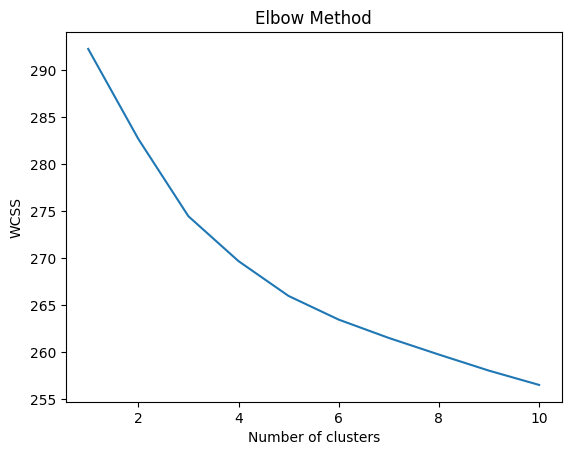

In [7]:

wcss = []
max_clusters = 10  # Example max number. You can adjust this based on your needs.

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(embeddings_name )
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/si

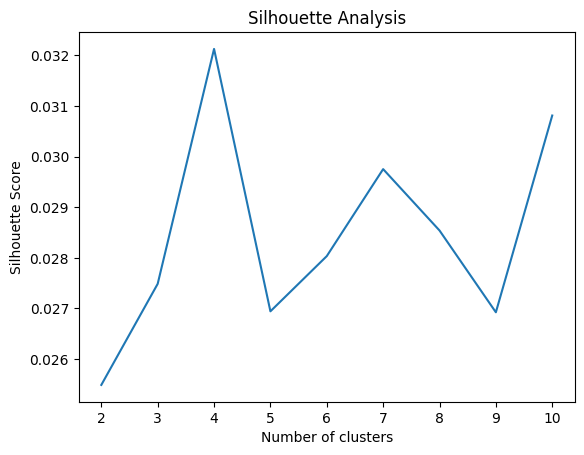

In [8]:


sil = []

for i in range(2, max_clusters + 1):  # Silhouette score requires at least 2 clusters.
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(embeddings_name)
    silhouette_avg = silhouette_score(embeddings_name, kmeans.labels_)
    sil.append(silhouette_avg)

plt.plot(range(2, max_clusters + 1), sil)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

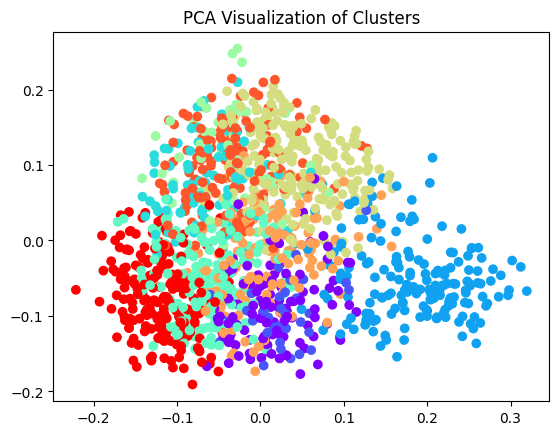

In [30]:


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings_name)

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('PCA Visualization of Clusters')
plt.show()

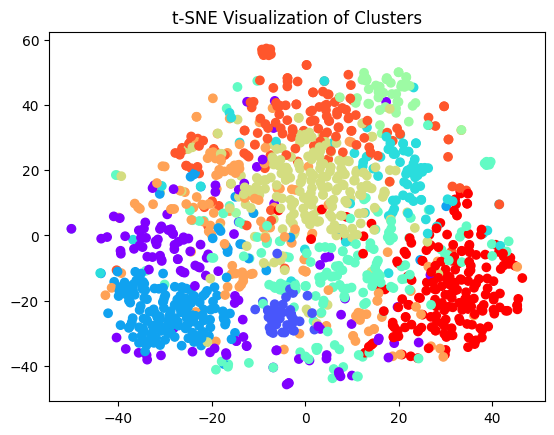

In [31]:


tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings_name)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('t-SNE Visualization of Clusters')
plt.show()

In [34]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(embeddings_name)
labels = km.labels_


c:\Users\pablo.ferreiro\innk\innk_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
df['cluster_name'] = labels
df[['cluster_name', 'name']]

,cluster_name,name
0,1,RoPeRo
1,3,Generación de energía con residuos
2,3,Compactador de basura
3,1,Espanta palomas
4,0,Impresora 3D para tienda Metro
...,...,...
1354,2,Mejora en la consulta de información para el á...
1355,2,Implementación del CCIF (Centro de Control de ...
1356,3,Pórtico eléctrico para izaje.
1357,1,Prueba


In [9]:
class fit_clusters():
    
    def __init__(self, data, n_clusters=5, max_iter=300):
        self.data = data
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.kmeans = KMeans(n_clusters=self.n_clusters, max_iter=self.max_iter ,random_state=0)
        self.labels = ''
        self.max_clusters = 25
    
    def fit(self):
        self.kmeans.fit(self.data)
        self.labels = self.kmeans.labels_
        return 
    
    def silhouette_score(self):
        sil = []

        for i in range(2, self.max_clusters + 1):  # Silhouette score requires at least 2 clusters.
            kmeans_s = KMeans(n_clusters=i, init='k-means++', random_state=42)
            kmeans_s.fit(self.data)
            silhouette_avg = silhouette_score(self.data, kmeans_s.labels_)
            sil.append(silhouette_avg)

        plt.plot(range(2, self.max_clusters + 1), sil)
        plt.title('Silhouette Analysis')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhouette Score')
        plt.show()

    def tnse_visualization(self):
        tsne = TSNE(n_components=2, random_state=42)
        tsne_results = tsne.fit_transform(self.data)

        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=self.kmeans.labels_, cmap='rainbow')
        plt.title('t-SNE Visualization of Clusters')
        plt.show()
    
    def pca_visualization(self):
        pca = PCA(n_components=2)
        pca_results = pca.fit_transform(self.data)

        plt.scatter(pca_results[:, 0], pca_results[:, 1], c=self.kmeans.labels_, cmap='rainbow')
        plt.title('PCA Visualization of Clusters')
        plt.show()

In [10]:
embeddings_name = df['name_embedded'].tolist()
embeddings_name  = np.array(embeddings_name)

name_emb = fit_clusters(embeddings_name)

c:\Users\pablo.ferreiro\innk\innk_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


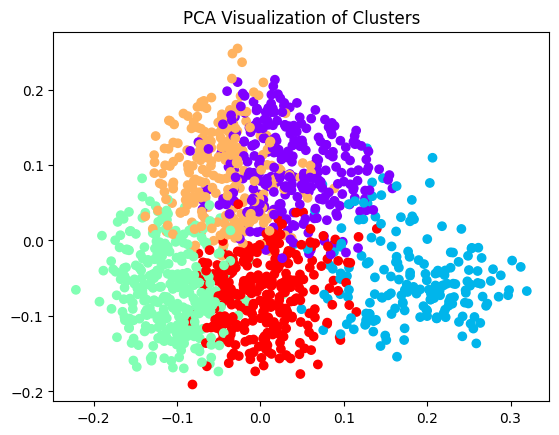

c:\Users\pablo.ferreiro\innk\innk_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pablo.ferreiro\innk\innk_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pablo.ferreiro\innk\innk_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pablo.ferreiro\innk\innk_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

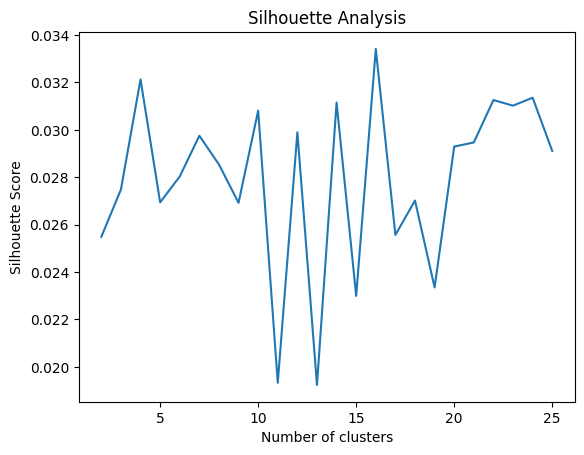

In [47]:
name_emb.fit()
name_emb.pca_visualization()
name_emb.silhouette_score()


/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


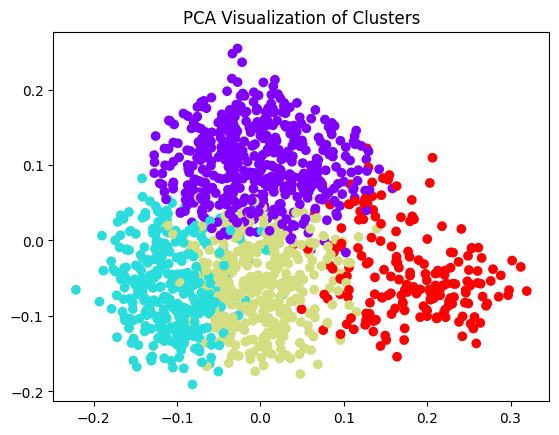

In [11]:
name_emb = fit_clusters(embeddings_name, 4)
name_emb.fit()
name_emb.pca_visualization()

In [12]:

embedding_solution = df.loc[~df.loc[:,'sol_1_embedded'].isnull(),'sol_1_embedded'].to_list()
embedding_solution  = np.array(embedding_solution)

check_dim(embedding_solution)

All embeddings have the dimension: 1536


/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/si

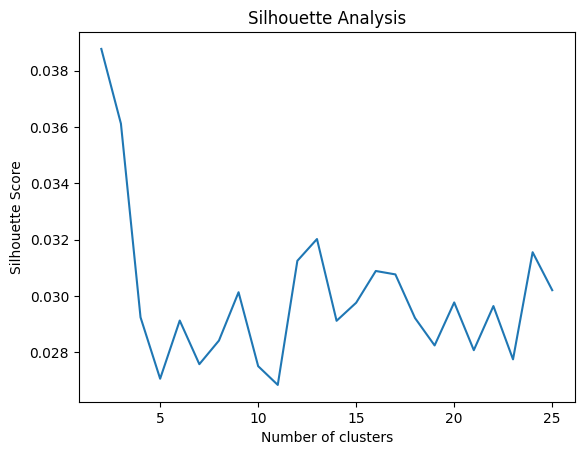

In [13]:
sol_emb =  fit_clusters(embedding_solution)
sol_emb.silhouette_score()

c:\Users\pablo.ferreiro\innk\innk_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


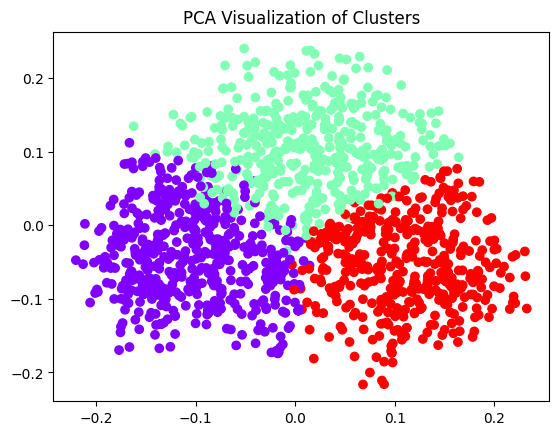

In [44]:
sol_emb = fit_clusters(embedding_solution, 3)
sol_emb.fit()
sol_emb.pca_visualization()



In [14]:
df2 = df.loc[~df.loc[:,'sol_1_embedded'].isnull()]
df2['combined_emb'] = df2.apply(lambda x: np.mean([x['name_embedded'], x['sol_1_embedded']], axis=0), axis=1)
combined_emb = np.array(df2['combined_emb'].to_list())

/var/folders/bd/qc5wgfkj3xnfwnyym8xqkzt00000gn/T/ipykernel_39501/1777942880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['combined_emb'] = df2.apply(lambda x: np.mean([x['name_embedded'], x['sol_1_embedded']], axis=0), axis=1)


/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/si

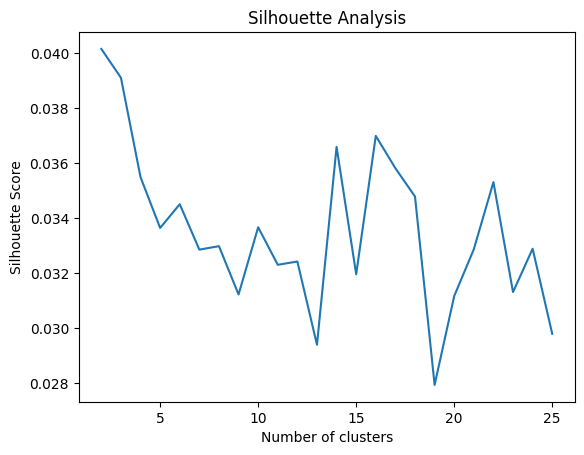

In [15]:
comb_emb =  fit_clusters(combined_emb)
comb_emb.silhouette_score()

/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


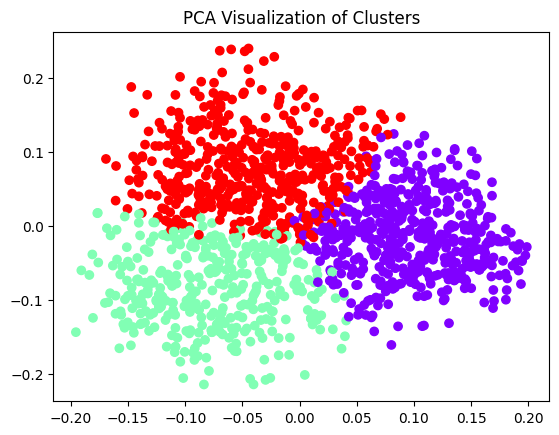

In [16]:
comb_emb = fit_clusters(combined_emb, 3)
comb_emb.fit()
comb_emb.pca_visualization()


In [17]:
df2['combined_labels'] = comb_emb.labels

/var/folders/bd/qc5wgfkj3xnfwnyym8xqkzt00000gn/T/ipykernel_39501/1069768268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['combined_labels'] = comb_emb.labels


In [60]:
df2[['name', 'solution_1', 'combined_labels']].to_excel(path_to_drive +r'cluster_117.xlsx', index=False)

/Users/pabloferreiro/Projects/innk_dw/innk_dw_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


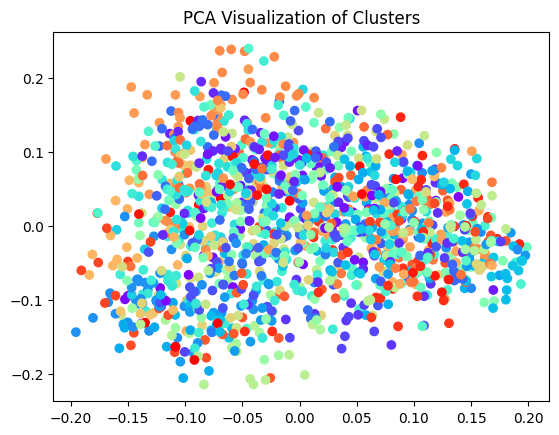

In [18]:
mult = fit_clusters(combined_emb, 150)
mult.fit()
mult.pca_visualization()

In [19]:
df2['combined_labels'] = mult.labels
df2[['name', 'idea_db_id', 'solution_1', 'combined_labels']].to_excel(path_to_drive +r'cluster_117.xlsx', index=False)

/var/folders/bd/qc5wgfkj3xnfwnyym8xqkzt00000gn/T/ipykernel_39501/2655333201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['combined_labels'] = mult.labels
